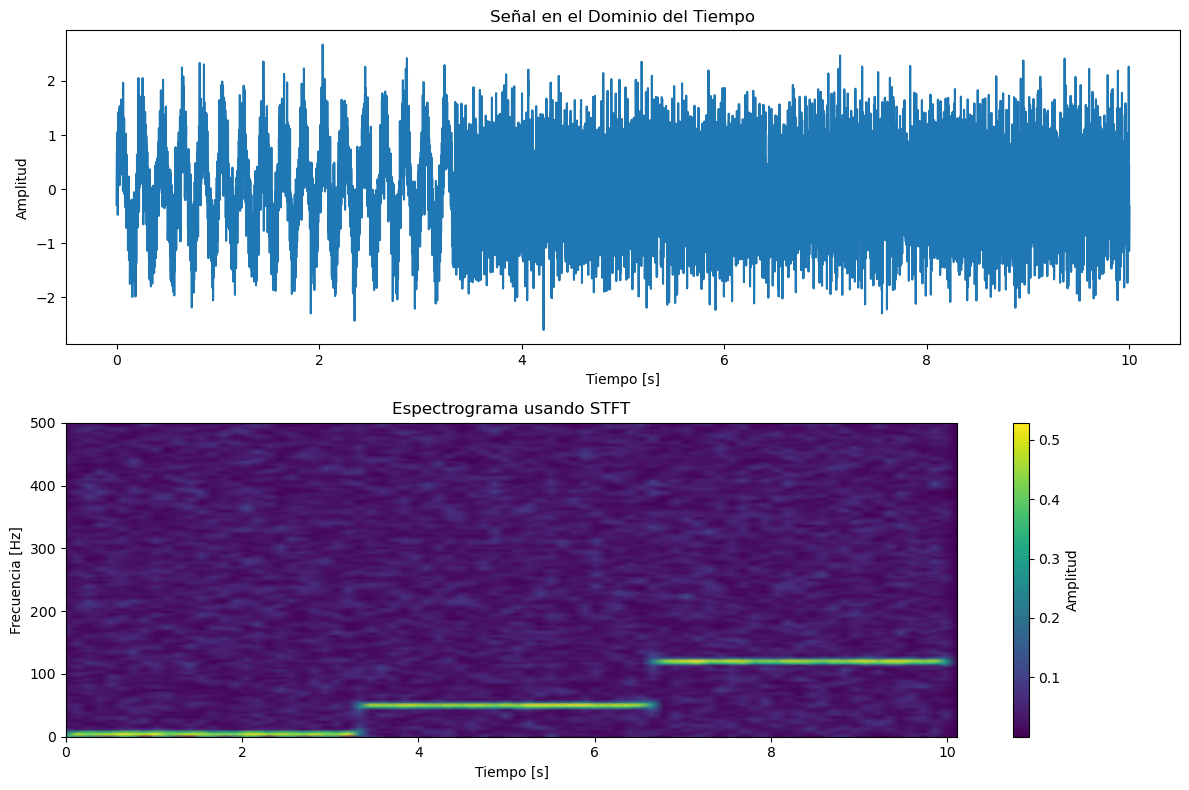

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generar una señal de ejemplo con componentes de frecuencia variable
f_s = 1000  # Frecuencia de muestreo
t = np.linspace(0.0, 10.0, 10 * f_s, endpoint=False)  # Vector de tiempo de 10 segundos
f1 = 5.0  # Frecuencia inicial de la señal
f2 = 50.0  # Frecuencia intermedia de la señal
f3 = 120.0  # Frecuencia final de la señal

# Crear una señal concatenada
señal = np.concatenate([
    np.sin(2 * np.pi * f1 * t[:len(t)//3]),
    np.sin(2 * np.pi * f2 * t[len(t)//3:2*len(t)//3]),
    np.sin(2 * np.pi * f3 * t[2*len(t)//3:])
])

# Añadir ruido gaussiano
ruido = 0.5 * np.random.normal(size=t.shape)
señal += ruido

# Calcular la STFT
f, t_stft, Zxx = stft(señal, f_s, nperseg=256)

# Visualización de la señal original
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, señal)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal en el Dominio del Tiempo')

# Visualización de la STFT
plt.subplot(2, 1, 2)
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label='Amplitud')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Espectrograma usando STFT')

plt.tight_layout()
plt.show()
